In [21]:
import statsmodels.api as sm
import seaborn as sns


airports = sm.datasets.get_rdataset('airports', 'nycflights13').data
flights = sm.datasets.get_rdataset('flights', 'nycflights13').data
planes = sm.datasets.get_rdataset('planes', 'nycflights13').data
weather = sm.datasets.get_rdataset('weather', 'nycflights13').data
# airlines = sm.datasets.get_rdataset('airlines', 'nycflights13').data

### a
newFlights = flights.groupby('dest')['arr_delay'].mean()
df_join = newFlights.to_frame().merge(airports, how='left', left_on='dest', right_on='faa')
df_join.head()


,arr_delay,faa,name,lat,lon,alt,tz,dst,tzone
0,4.381890,ABQ,Albuquerque International Sunport,35.040222,-106.609194,5355.0,-7.0,A,America/Denver
1,4.852273,ACK,Nantucket Mem,41.253053,-70.060181,48.0,-5.0,A,America/New_York
2,14.397129,ALB,Albany Intl,42.748267,-73.801692,285.0,-5.0,A,America/New_York
3,-2.500000,ANC,Ted Stevens Anchorage Intl,61.174361,-149.996361,152.0,-9.0,A,America/Anchorage
4,11.300113,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York


B

This graph shows the delay time of the plane by manufacture year with no departure delay.
There is no devedence that shows age of the plane is related to arrival delay.


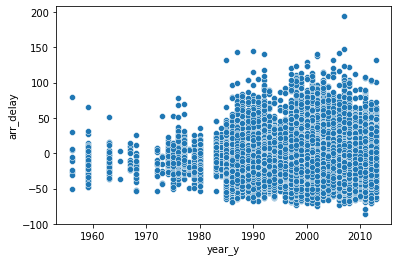

In [19]:
### b
df_join = flights.merge(planes, how='left', left_on='tailnum', right_on='tailnum')[(flights.dep_delay<=0)].filter(['year_y', 'arr_delay'])
sns.scatterplot(data=df_join, x=df_join['year_y'], y=df_join['arr_delay'])
print('This graph shows the delay time of the plane by manufacture year with no departure delay.')
print('There is no devedence that shows age of the plane is related to arrival delay.')

C

In [24]:
### c
df_dep_delay = flights.merge(weather, how='left', left_on=['origin', 'time_hour'], right_on=['origin', 'time_hour']).filter(['time_hour', 'sched_dep_time', 'dep_delay', 'origin', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_gust', 'precip', 'pressure', 'visib']).sort_values(by='dep_delay', ascending=False)
print('This table shows the delay time of the plane by and the weather conditions')
print('There is strong relation between them')
df_dep_delay.head(100)

This table shows the delay time of the plane by and the weather conditions
There is strong relation between them


,time_hour,sched_dep_time,dep_delay,origin,temp,dewp,humid,wind_dir,wind_gust,precip,pressure,visib
7072,2013-01-09 09:00:00,900,1301.0,JFK,44.96,37.04,73.59,210.0,NaN,0.0,1029.0,8.0
235778,2013-06-15 19:00:00,1935,1137.0,JFK,68.00,59.00,72.92,200.0,NaN,0.0,1013.9,10.0
8239,2013-01-10 16:00:00,1635,1126.0,EWR,46.94,21.92,36.85,310.0,NaN,0.0,1032.8,10.0
327043,2013-09-20 18:00:00,1845,1014.0,JFK,66.92,59.00,75.69,170.0,NaN,0.0,1017.0,10.0
270376,2013-07-22 16:00:00,1600,1005.0,JFK,80.96,73.04,76.90,100.0,NaN,0.0,1011.4,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
182153,2013-04-18 14:00:00,1453,427.0,LGA,57.92,42.08,55.47,130.0,NaN,0.0,1025.3,10.0
246737,2013-06-27 17:00:00,1720,426.0,LGA,82.04,68.00,62.53,140.0,23.0156,0.0,1004.7,10.0
306513,2013-08-28 16:00:00,1652,424.0,EWR,75.92,71.06,84.92,0.0,NaN,0.0,1011.0,8.0
187708,2013-04-24 13:00:00,1345,423.0,LGA,60.98,44.06,53.65,170.0,NaN,0.0,1013.6,10.0


D

In [29]:
### d
sortByDep=flights[(flights.year==2013) & (flights.month==6) & (flights.day==13)].sort_values(by='dep_delay', ascending=False)
print('This table shows the delay time of departure order by departure time desc')
print('There was rain, fog and strong wind in New York')
sortByDep.head(100)

This table shows the delay time of departure order by departure time desc
There was rain, fog and strong wind in New York


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
234237,2013,6,13,2242.0,1515,447.0,232.0,1816,496.0,DL,2181,N943DL,LGA,MCO,135.0,950,15,15,2013-06-13 15:00:00
233394,2013,6,13,226.0,1900,446.0,430.0,2130,420.0,DL,947,N689DL,LGA,ATL,97.0,762,19,0,2013-06-13 19:00:00
233944,2013,6,13,1627.0,959,388.0,1815.0,1114,421.0,EV,5711,N820AS,JFK,IAD,56.0,228,9,59,2013-06-13 09:00:00
234194,2013,6,13,2127.0,1459,388.0,125.0,1737,468.0,DL,451,N687DL,LGA,ATL,110.0,762,14,59,2013-06-13 14:00:00
233375,2013,6,13,19.0,1759,380.0,253.0,2049,364.0,B6,391,N595JB,LGA,MCO,131.0,950,17,59,2013-06-13 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233735,2013,6,13,1146.0,930,136.0,1432.0,1230,122.0,WN,1983,N777QC,EWR,AUS,200.0,1504,9,30,2013-06-13 09:00:00
233898,2013,6,13,1545.0,1329,136.0,1709.0,1434,155.0,B6,1338,N334JB,JFK,MVY,31.0,173,13,29,2013-06-13 13:00:00
233825,2013,6,13,1430.0,1214,136.0,1538.0,1335,123.0,UA,1037,N37290,EWR,BOS,42.0,200,12,14,2013-06-13 12:00:00
234260,2013,6,13,2345.0,2130,135.0,231.0,22,129.0,B6,29,N630JB,JFK,TPA,138.0,1005,21,30,2013-06-13 21:00:00
